🚀 Descargando dataset...


100%|██████████| 28.8M/28.8M [00:00<00:00, 189MB/s]

Extracting files...


📂 Trabajando en: /root/.cache/kagglehub/datasets/ihelon/lego-minifigures-classification/versions/30
🎯 Filtraremos solo estas clases: ['harry-potter', 'jurassic-world', 'marvel', 'star-wars']

--- CARGANDO DATOS ---
Found 334 images belonging to 4 classes.
Found 81 images belonging to 4 classes.
✅ Clases finales detectadas (4): ['harry-potter', 'jurassic-world', 'marvel', 'star-wars']
⚖️ Pesos aplicados: {0: np.float64(3.9761904761904763), 1: np.float64(3.630434782608696), 2: np.float64(0.5387096774193548), 3: np.float64(0.6185185185185185)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,191,684 (8.36 MB)

 Trainable params: 2,191,684 (8.36 MB)

 Non-trainable params: 0 (0.00 B)


Iniciando entrenamiento FINAL por 30 épocas...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


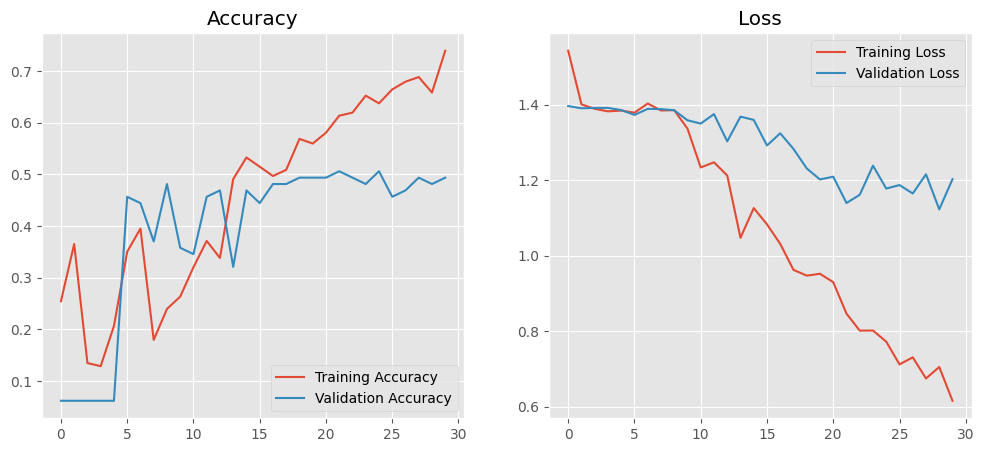


--- MATRIZ FINAL ---
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


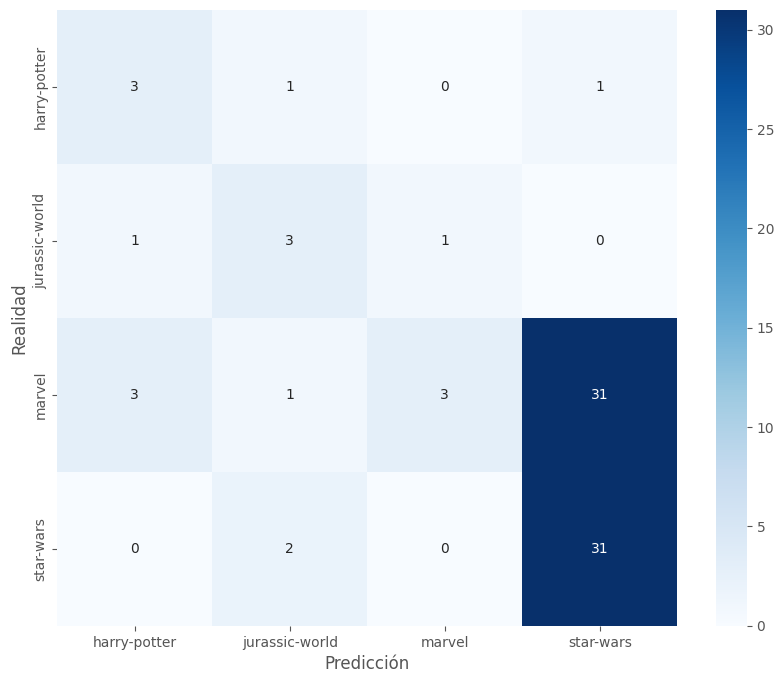

                precision    recall  f1-score   support

  harry-potter       0.43      0.60      0.50         5
jurassic-world       0.43      0.60      0.50         5
        marvel       0.75      0.08      0.14        38
     star-wars       0.49      0.94      0.65        33

      accuracy                           0.49        81
     macro avg       0.52      0.55      0.45        81
  weighted avg       0.61      0.49      0.39        81



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kagglehub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

plt.style.use('ggplot')

#DESCARGA
print("🚀 Descargando dataset...")
path = kagglehub.dataset_download("ihelon/lego-minifigures-classification")
base_dir = path

#DEFINICIÓN DE CLASES VÁLIDAS
CLASES_REALES = ['harry-potter', 'jurassic-world', 'marvel', 'star-wars']

print(f"📂 Trabajando en: {base_dir}")
print(f"🎯 Filtraremos solo estas clases: {CLASES_REALES}")

#DATA AUGMENTATION
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    validation_split=0.2
)

#GENERADORES (Con filtro de clases)
print("\n--- CARGANDO DATOS ---")
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASES_REALES,
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASES_REALES,
    subset='validation',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
num_classes = train_generator.num_classes
print(f"✅ Clases finales detectadas ({num_classes}): {class_names}")

#PESOS DE CLASE
train_classes = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_classes),
    y=train_classes
)
class_weights_dict = dict(enumerate(class_weights))
print(f"⚖️ Pesos aplicados: {class_weights_dict}")

#ARQUITECTURA
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

#ENTRENAMIENTO
EPOCAS = 30
print(f"\nIniciando entrenamiento FINAL por {EPOCAS} épocas...")
history = model.fit(
    train_generator,
    epochs=EPOCAS,
    validation_data=validation_generator,
    class_weight=class_weights_dict,
    verbose=0 # Added verbose=0 to suppress per-epoch output
)

#VISUALIZACIÓN
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

print("\n--- MATRIZ FINAL ---")
validation_generator.reset() # Importante resetear antes de predecir
Y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_names))

/tmp/ipython-input-1331313768.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


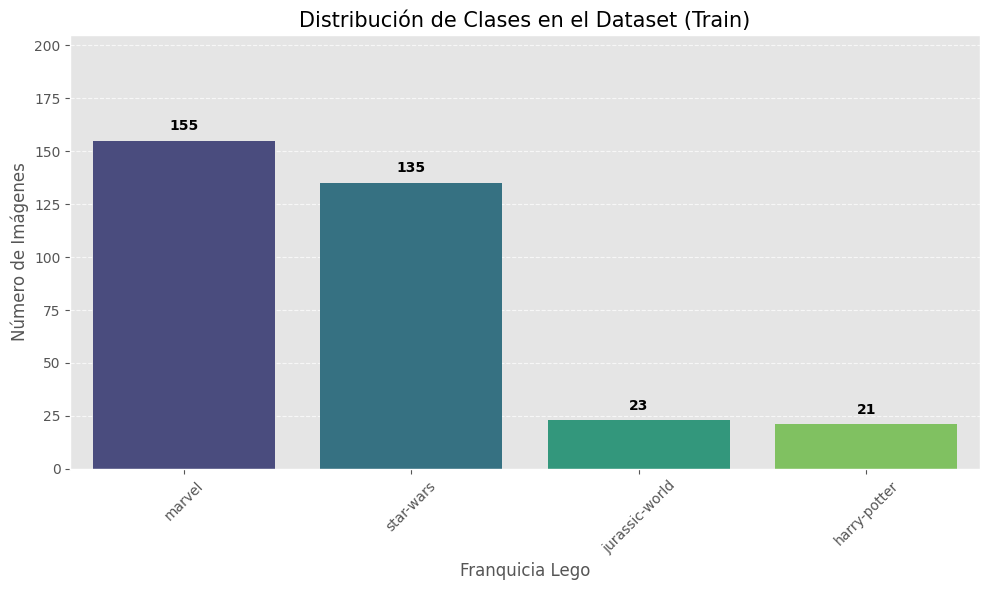

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Obtener los datos del generador
# train_generator.classes tiene los IDs de todas las fotos (ej: 0, 0, 1, 3...)
clases_indices = train_generator.classes
nombres_clases = list(train_generator.class_indices.keys())

# 2. Contar cuántas fotos hay por cada clase
conteo = []
for i in range(len(nombres_clases)):
    cantidad = (clases_indices == i).sum()
    conteo.append(cantidad)

# 3. Crear un DataFrame para facilitar el gráfico
df_balance = pd.DataFrame({
    'Personaje': nombres_clases,
    'Cantidad de Fotos': conteo
})

# Ordenamos para que se vea más dramático el desbalance
df_balance = df_balance.sort_values('Cantidad de Fotos', ascending=False)

# 4. Graficar
plt.figure(figsize=(10, 6))
grafico = sns.barplot(
    data=df_balance,
    x='Personaje',
    y='Cantidad de Fotos',
    palette='viridis' # Colores bonitos
)

# Añadir los números encima de las barras
for i in range(len(df_balance)):
    # Obtenemos el valor
    valor = df_balance.iloc[i]['Cantidad de Fotos']
    # Lo escribimos encima de la barra
    grafico.text(i, valor + 5, str(valor), ha='center', color='black', fontweight='bold')

plt.title('Distribución de Clases en el Dataset (Train)', fontsize=15)
plt.ylabel('Número de Imágenes')
plt.xlabel('Franquicia Lego')
plt.xticks(rotation=45) # Rotar nombres si son largos
plt.ylim(0, max(conteo) + 50) # Dar espacio arriba
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()